<a href="https://colab.research.google.com/github/carolinajas911/dm2024c/blob/main/tpfinalneurociencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio final - Materia: Datos Científicos - Nombre: Carolina Raquel Jaschevatzky - DNI: 20.463.794
Introducción: Elijo trabajar con los datos correspondientes a la línea de base (archivo "carobaseline.dat"), los ojos cerrados "caroojoscerrados", y los archivos con y sin anteojos (respectivamente "caromirarconanteojos" y "caromirarsinanteojos").
El  motivo de esta elección es una publicación hecha en la página de Facebook del Technion de Haifa sobre una tecnología que identifica la interacción de un lector con un texto utlizando únicamente los movimientos de los ojos (https://www.technion.ac.il/en/blog/article/eyes-on-the-text/ ). En este punto también recordé  los casos que vimos en clase como  "Fallacies of Data Science".
Estos antecedentes me llevaron a preguntarme si los datos obtenidos de mirar con o sin anteojos podrían estar mostrando mi capacidad de focalizar la vista en una marca, independientemente del uso de anteojos.

In [ ]:
pip install pybaselines

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 4.8 MB/s eta 0:00:00



Signal Feature Classification

# Run with a virtual environment with keras, sklearn, numpy and tensorflow installed.
# EPOC Emotiv file format https://arxiv.org/pdf/2206.09051


Análisis exploratorio de datos
Estructura de la informacion:
      timestamp  counter  eeg  attention  meditation  blinking
0  1.752273e+09       48 -131          0           0         0
1  1.752273e+09       49 -150          0           0         0
2  1.752273e+09       50 -163          0           0         0
3  1.752273e+09       51 -183          0           0         0
4  1.752273e+09       52 -220          0           0         0
Ahora tienen un tensor de numpy (data) correspondiente al archivo "caromirarconanteojos.dat
Estructura de la informacion:
      timestamp  counter  eeg  attention  meditation  blinking
0  1.752273e+09       58   24          0           0         0
1  1.752273e+09       59    8          0           0         0
2  1.752273e+09       60    3          0           0         0
3  1.752

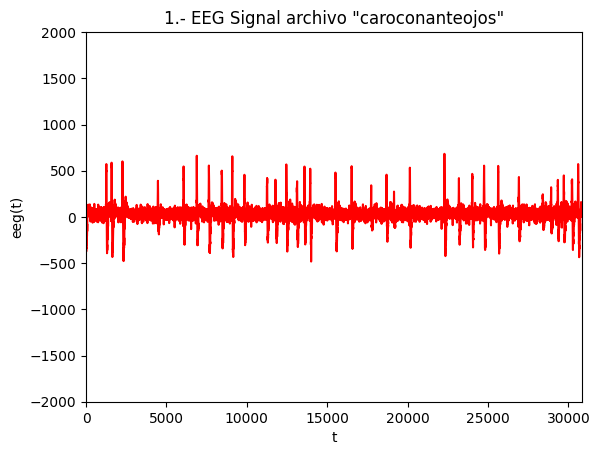

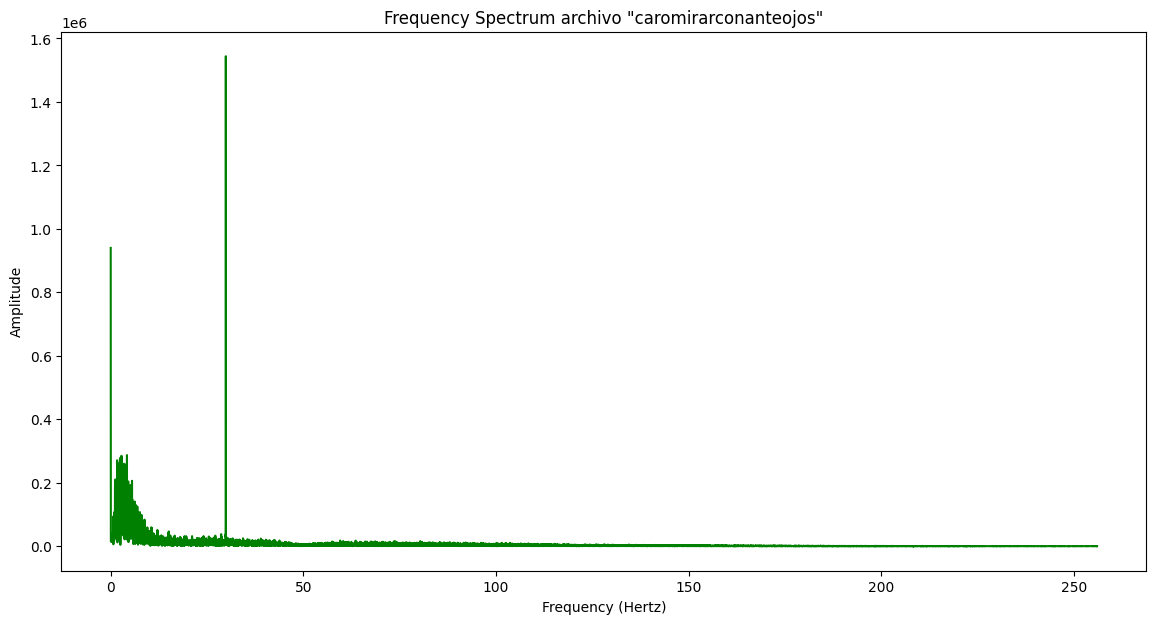

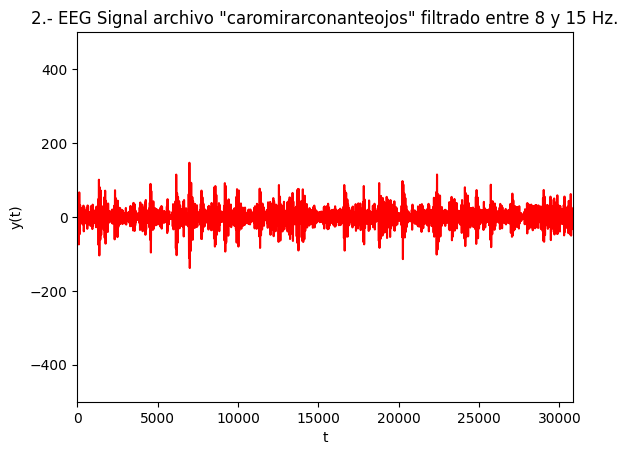

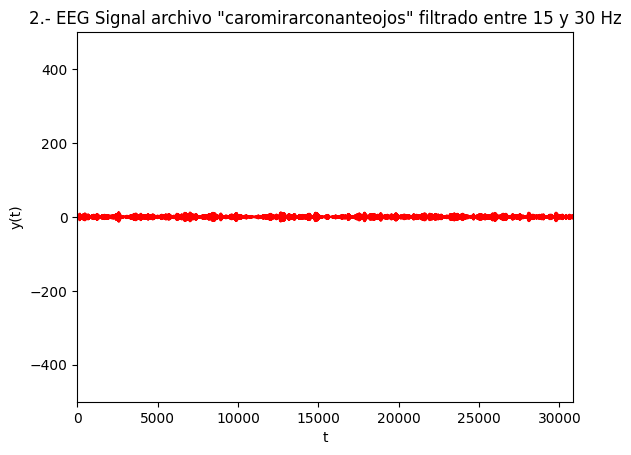

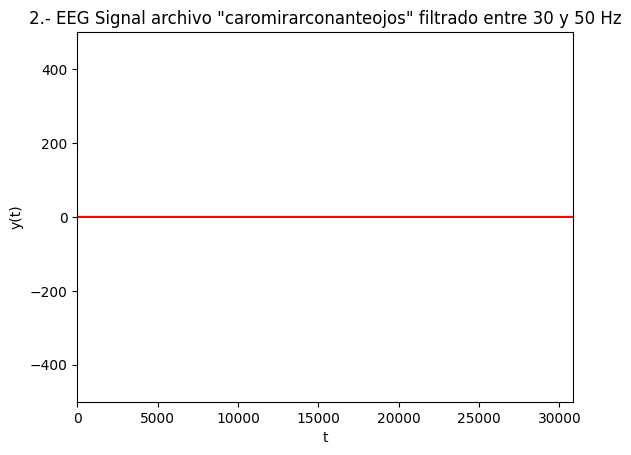

Valores mayores a 550 "caromirarsinanteojos":
[504. 505. 525. 565. 554. 522. 506. 505. 513. 522. 555. 586. 580. 562.
 550. 551. 544. 518. 545. 577. 562. 515. 516. 528. 516. 502. 509. 546.
 565. 541. 506. 508. 518. 525. 529. 546. 551. 518. 522. 546. 537. 520.
 506. 565. 571. 519. 505. 501. 528. 502. 530. 567. 553. 505. 530. 530.
 501. 513. 537. 545. 508. 503. 505. 519. 547. 545. 524. 519. 538. 578.
 597. 556. 507. 521. 549. 572. 571. 553. 555. 587. 613. 609. 578. 565.
 570. 568. 553. 544. 547. 529. 514. 547. 505. 547. 625. 644. 597. 567.
 611. 652. 631. 604. 595. 567. 554. 576. 568. 545. 530. 546. 557. 524.
 523. 553. 565. 563. 551. 564. 594. 586. 549. 512. 504. 551. 569. 552.
 523. 528. 544. 518. 521. 521. 529. 555. 569. 587. 620. 659. 680. 658.
 636. 658. 672. 649. 616. 597. 586. 562. 521. 522. 540. 520. 553. 571.
 520. 512. 587. 610. 580. 565. 560. 541. 538. 517. 539. 588. 585. 582.
 584. 564. 567. 627. 678. 669. 635. 611. 600. 610. 616. 613. 598. 580.
 565. 546. 507. 501. 513. 524. 

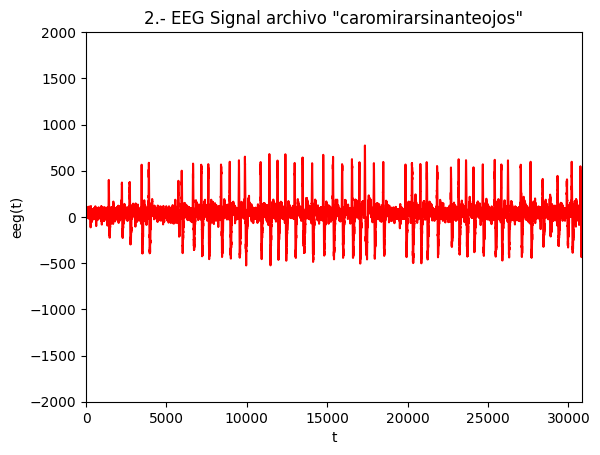

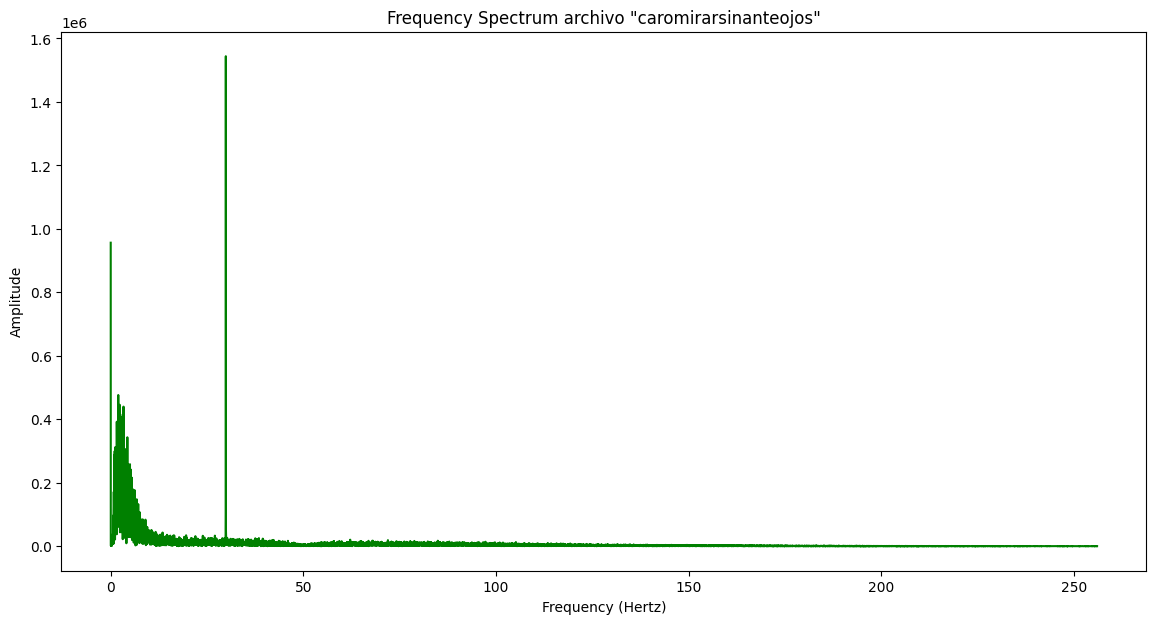

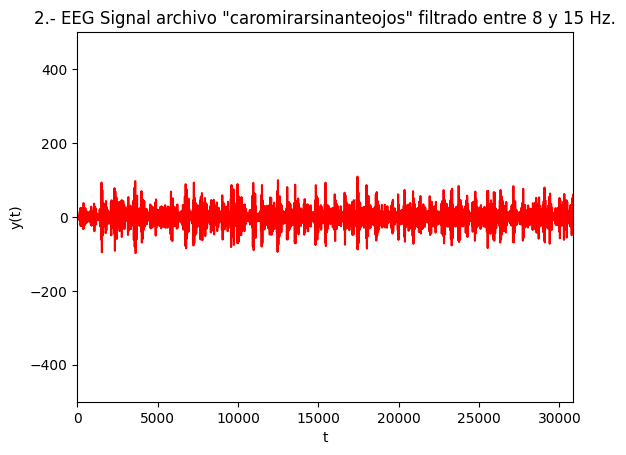

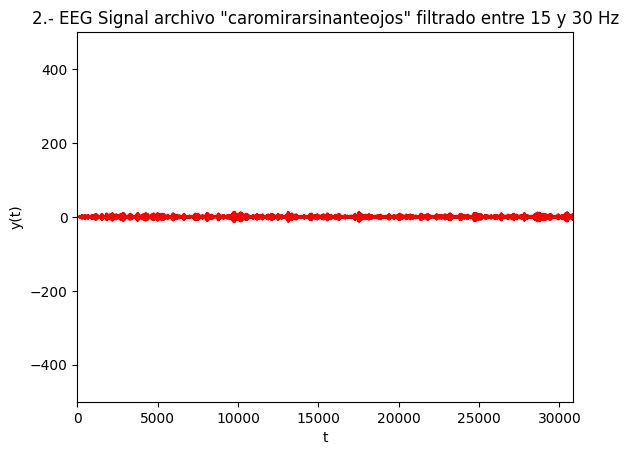

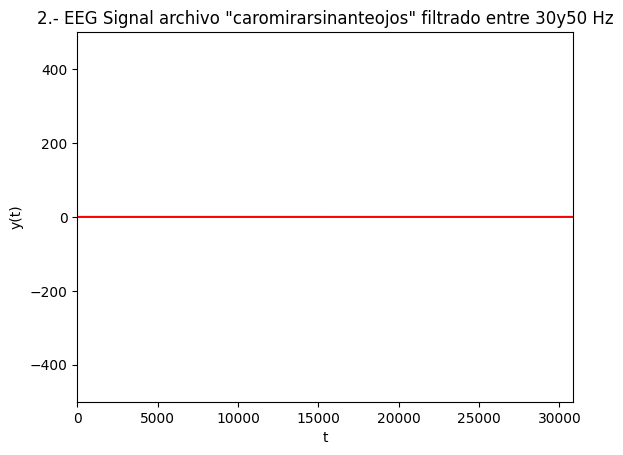

Forma 30840, 6:
Python slicing...[:,].  El ':' sirve para indicar el rango desde hasta.  Los indices son posiciones segun la forma del tensor.
Valores mayores a 550 "carobaseline":
[520. 565. 602. 617. 587. 547. 538. 567. 588. 593. 581. 563. 538. 506.
 539. 596. 628. 653. 667. 647. 656. 704. 758. 777. 779. 790. 768. 757.
 804. 855. 840. 794. 739. 709. 689. 647. 627. 614. 573. 530. 502. 518.
 515. 502. 520. 546. 589. 642. 649. 621. 586. 560. 537. 531. 536. 540.
 519. 503. 524. 555. 566. 539. 524. 504. 534. 566. 588. 561. 523. 578.
 604. 545. 505. 505. 524. 565. 580. 572. 556. 534. 503. 533. 582. 616.
 594. 565. 601. 662. 650. 598. 583. 616. 644. 640. 627. 629. 614. 566.
 546. 545. 535. 516. 531. 580. 610. 616. 601. 589. 603. 633. 651. 642.
 629. 631. 624. 594. 549. 520. 507. 508. 512. 502. 508. 523. 551. 566.
 566. 550. 530. 532. 536. 569. 610. 616. 565. 502. 531. 550. 540. 524.
 529. 566. 586. 554. 548. 577. 581. 565. 546. 528. 516. 516. 520. 528.
 549. 552. 562. 580. 592. 582. 561. 54

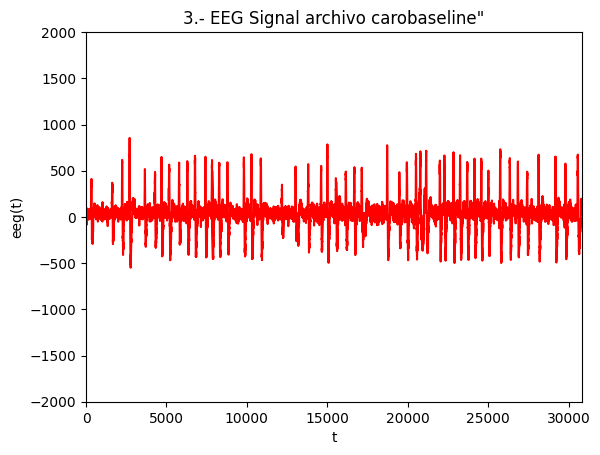

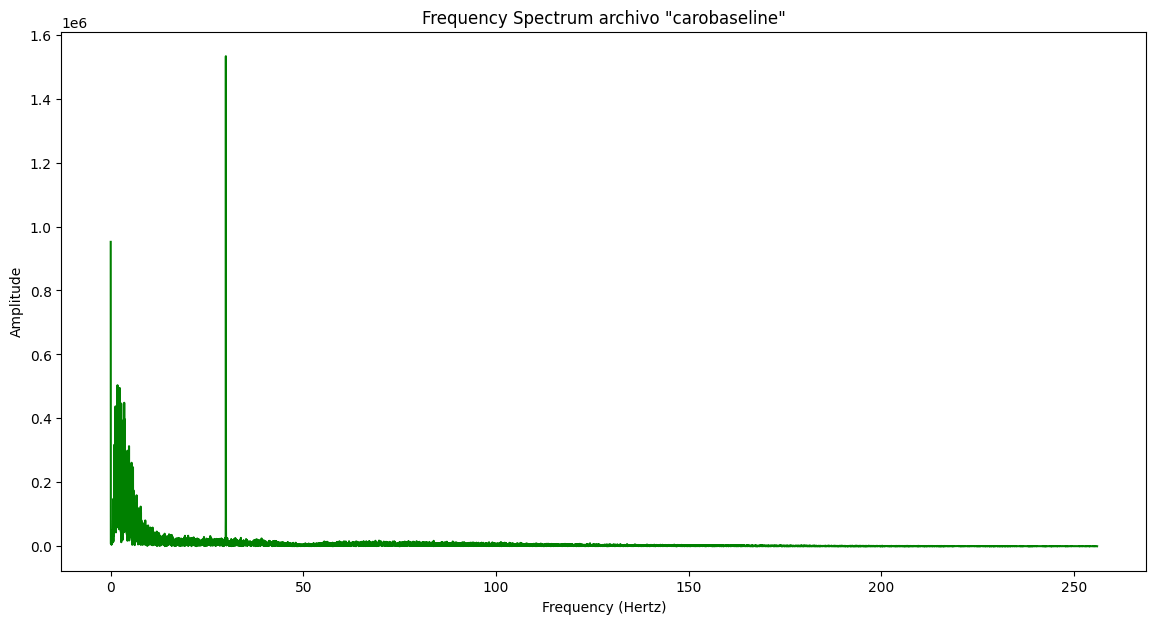

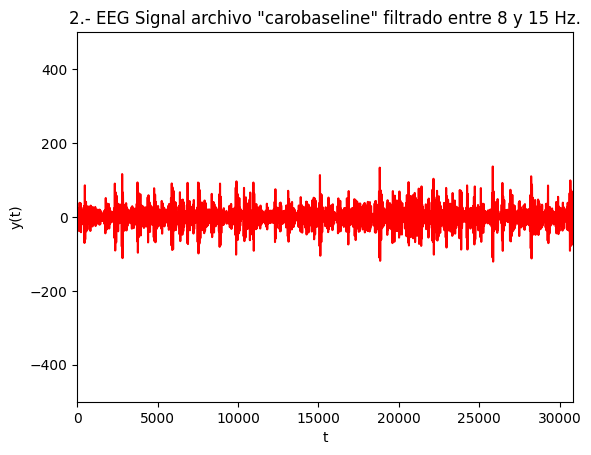

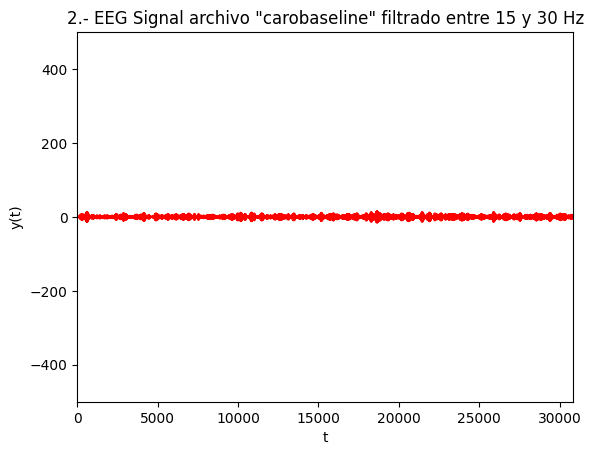

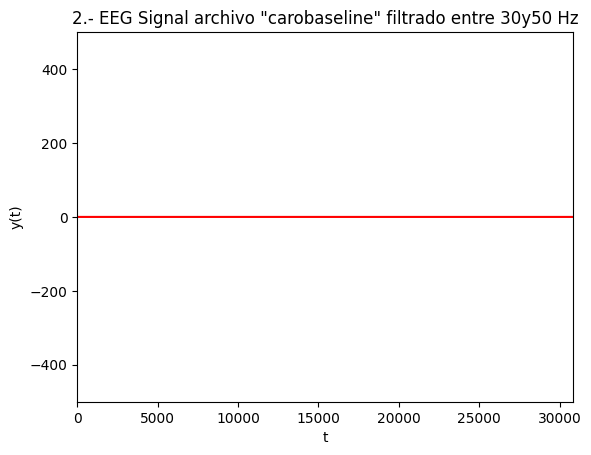

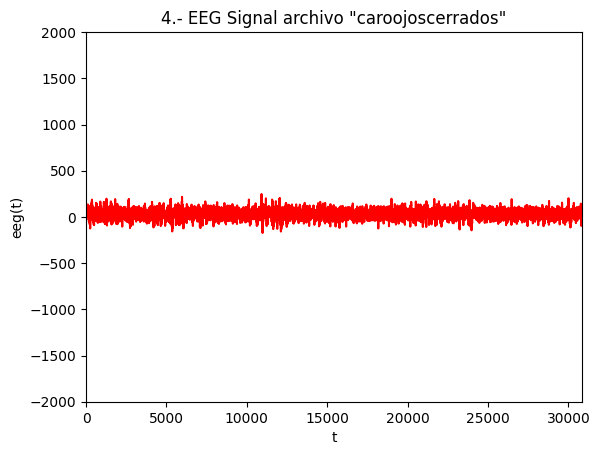

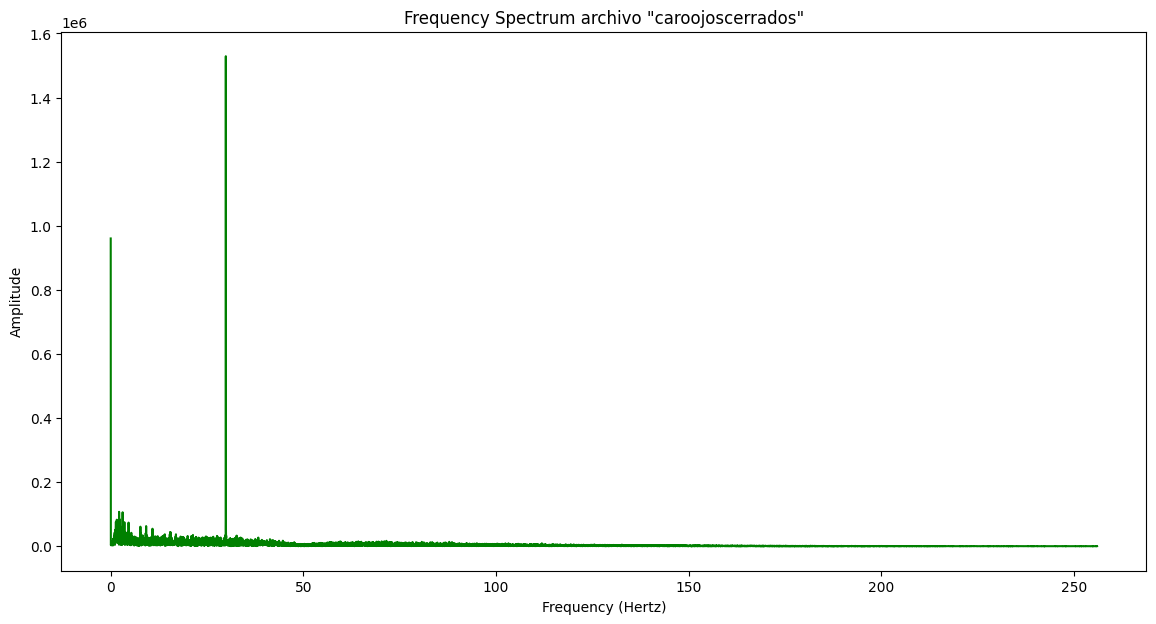

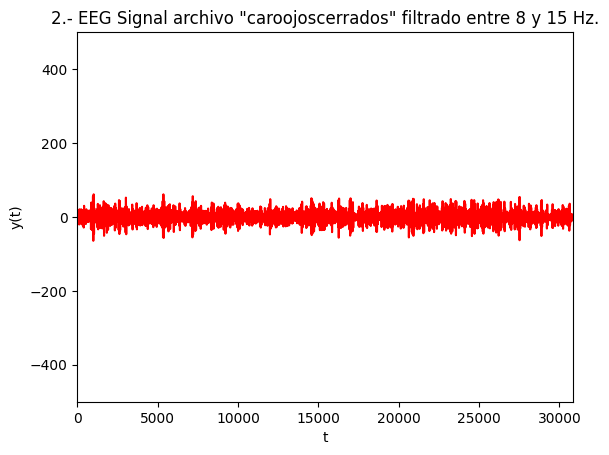

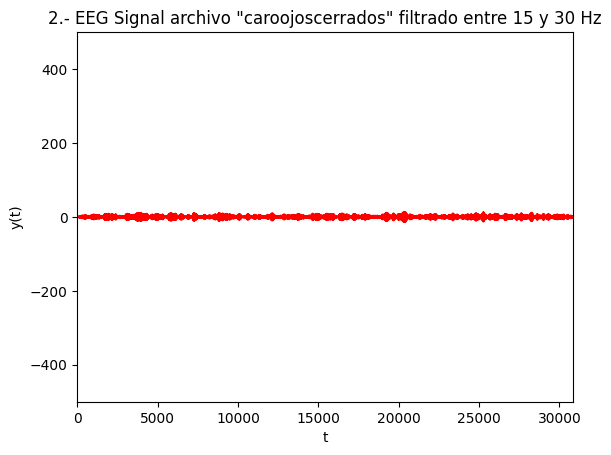

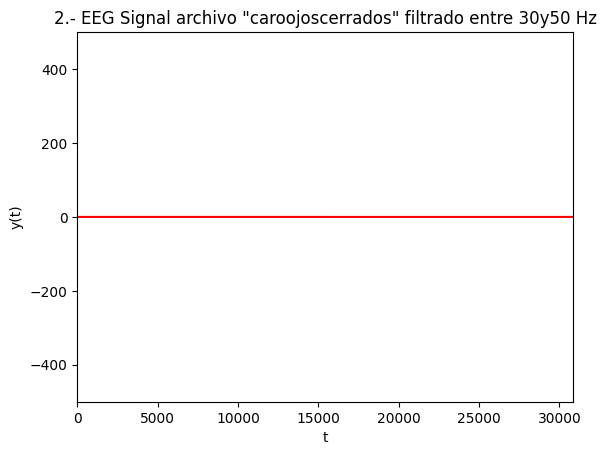

In [171]:
print(__doc__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO
import sys, select
import time
import datetime
import os
from scipy.fftpack import fft
import math
from scipy.fft import rfft, rfftfreq
import scipy.sparse as sparse
from scipy.sparse.linalg  import spsolve
from pybaselines import Baseline, utils
from scipy.signal import firwin, remez, kaiser_atten, kaiser_beta
from scipy.signal import butter, filtfilt, buttord, lfilter
import math

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


print ('Análisis exploratorio de datos')
signals1 = pd.read_csv("caromirarconanteojos.dat", delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])
print('Estructura de la informacion:')
print(signals1.head())
data1 = signals1.values
print('Ahora tienen un tensor de numpy (data) correspondiente al archivo "caromirarconanteojos.dat')
#print (data1)


signals2= pd.read_csv("caromirarsinanteojos.dat", delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])
print('Estructura de la informacion:')
print(signals2.head())
data2 = signals2.values
print('Ahora tienen un tensor de numpy (data) correspondiente al archivo "caromirarsinanteojos')
#print (data2)

signals3= pd.read_csv("carobaseline.dat", delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])
print('Estructura de la informacion:')
print(signals3.head())
data3 = signals3.values
print('Ahora tienen un tensor de numpy (data) correspondiente al archvio "carobaseline"')
#print (data3)

signals4= pd.read_csv("caroojoscerrados.dat", delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])
print('Estructura de la informacion:')
print(signals3.head())
data4 = signals4.values
print('Ahora tienen un tensor de numpy (data) correspondiente al archvio "carobaseline"')
#print (data4)

#print('Forma %2d,%2d:' % (signals1.shape))

#print('Python slicing...[:,].  El \':\' sirve para indicar el rango desde hasta.  Los indices son posiciones segun la forma del tensor.')

eeg = data1[:,2]

# Filtro de todos los valores solo aquellos que son efectivamente mayores a 550
print ('Valores mayores a 550 "caromirarconanteojos":')
eegf1 = eeg[eeg>500.0]
print (eegf1)

plt.plot(eeg,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'1.- EEG Signal archivo "caroconanteojos"')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()

#miro la composición espectral
Fs = 512.0

normalized_signal = eeg

N = len(normalized_signal)


#Creo una secuencia de N puntos (el largo de EEG), de 0 hasta el largo de la secuencia en segundos (N/Fs).
x = np.linspace(0.0, int(N/Fs), N)

#A esa secuencia de EEG le agrego una señal pura de 30 Hz.  Esto ayuda a visualizar bien que la relación espectral está ok.
# normalized_signal +=  100*np.sin(30.0 * 2.0*np.pi*x) # Commented out as it's adding an artificial signal

normalized_signal +=  100*np.sin(30.0 * 2.0*np.pi*x)
yf = rfft(normalized_signal)
xf = rfftfreq(N, 1 / Fs)


plt.figure(figsize=(14,7))
plt.title('Frequency Spectrum archivo "caromirarconanteojos"')
plt.plot(xf, np.abs(yf), color='green')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hertz)')
plt.show()

y=eeg

y = butter_bandpass_filter(y, 8.0, 15.0, 512.0, order=6)

#print(y)

plt.plot(y,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('y(t)');
plt.title(r'2.- EEG Signal archivo "caromirarconanteojos" filtrado entre 8 y 15 Hz.')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-500, 500]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()


# Le aplico un filtro pasabanda entre 15 y 30 Hz.  El resto se intenta planchar a cero.
y = butter_bandpass_filter(y, 15.0, 30.0, 512.0, order=6)

#print(y)

plt.plot(y,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('y(t)');
plt.title(r'2.- EEG Signal archivo "caromirarconanteojos" filtrado entre 15 y 30 Hz')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-500, 500]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()

# Le aplico un filtro pasabanda entre 30 y 50 Hz.  El resto se intenta planchar a cero.
y = butter_bandpass_filter(y, 30.0, 50.0, 512.0, order=6)

#print(y)

plt.plot(y,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('y(t)');
plt.title(r'2.- EEG Signal archivo "caromirarconanteojos" filtrado entre 30 y 50 Hz')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-500, 500]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()


#print('Forma %2d,%2d:' % (signals2.shape))

#print('Python slicing...[:,].  El \':\' sirve para indicar el rango desde hasta.  Los indices son posiciones segun la forma del tensor.

eeg = data2[:,2]

#print(eeg)

print ('Valores mayores a 550 "caromirarsinanteojos":')
eegf1 = eeg[eeg>500.0]
print (eegf1)

plt.plot(eeg,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'2.- EEG Signal archivo "caromirarsinanteojos"')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()

#miro la composición espectral
Fs = 512.0

normalized_signal = eeg

N = len(normalized_signal)


#Creo una secuencia de N puntos (el largo de EEG), de 0 hasta el largo de la secuencia en segundos (N/Fs).
x = np.linspace(0.0, int(N/Fs), N)

#A esa secuencia de EEG le agrego una señal pura de 30 Hz.  Esto ayuda a visualizar bien que la relación espectral está ok.
# normalized_signal +=  100*np.sin(30.0 * 2.0*np.pi*x) # Commented out as it's adding an artificial signal
normalized_signal +=  100*np.sin(30.0 * 2.0*np.pi*x)

yf = rfft(normalized_signal)
xf = rfftfreq(N, 1 / Fs)

plt.figure(figsize=(14,7))
plt.title('Frequency Spectrum archivo "caromirarsinanteojos"')
plt.plot(xf, np.abs(yf), color='green')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hertz)')
plt.show()

y=eeg

# Le aplico un filtro pasabanda entre 8 y 15 Hz.  El resto se intenta planchar a cero.
y = butter_bandpass_filter(y, 8.0, 15.0, 512.0, order=6)

#print(y)

plt.plot(y,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('y(t)');
plt.title(r'2.- EEG Signal archivo "caromirarsinanteojos" filtrado entre 8 y 15 Hz.')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-500, 500]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()



# Le aplico un filtro pasabanda entre 15 y 30 Hz.  El resto se intenta planchar a cero.
y = butter_bandpass_filter(y, 15.0, 30.0, 512.0, order=6)

#print(y)

plt.plot(y,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('y(t)');
plt.title(r'2.- EEG Signal archivo "caromirarsinanteojos" filtrado entre 15 y 30 Hz')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-500, 500]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()

# Le aplico un filtro pasabanda entre 30 y 50 Hz.  El resto se intenta planchar a cero.
y = butter_bandpass_filter(y, 30.0, 35, 512.0, order=6)

#print(y)

plt.plot(y,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('y(t)');
plt.title(r'2.- EEG Signal archivo "caromirarsinanteojos" filtrado entre 30y50 Hz')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-500, 500]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()


print('Forma %2d,%2d:' % (signals3.shape))

print('Python slicing...[:,].  El \':\' sirve para indicar el rango desde hasta.  Los indices son posiciones segun la forma del tensor.')
eeg = data3[:,2]

print ('Valores mayores a 550 "carobaseline":')
eegf1 = eeg[eeg>500.0]
print (eegf1)
#print(eeg)

plt.plot(eeg,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'3.- EEG Signal archivo carobaseline"')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()

#miro la composición espectral
Fs = 512.0

normalized_signal = eeg

N = len(normalized_signal)


#Creo una secuencia de N puntos (el largo de EEG), de 0 hasta el largo de la secuencia en segundos (N/Fs).
x = np.linspace(0.0, int(N/Fs), N)

#A esa secuencia de EEG le agrego una señal pura de 30 Hz.  Estoy ayuda a visualizar bien que la relación espectral está ok.
# normalized_signal +=  100*np.sin(30.0 * 2.0*np.pi*x) # Commented out as it's adding an artificial signal
normalized_signal +=  100*np.sin(30.0 * 2.0*np.pi*x)

yf = rfft(normalized_signal)
xf = rfftfreq(N, 1 / Fs)

plt.figure(figsize=(14,7))
plt.title('Frequency Spectrum archivo "carobaseline"')
plt.plot(xf, np.abs(yf), color='green')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hertz)')
plt.show()

y=eeg

y = butter_bandpass_filter(y, 8.0, 15.0, 512.0, order=6)

#print(y)

plt.plot(y,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('y(t)');
plt.title(r'2.- EEG Signal archivo "carobaseline" filtrado entre 8 y 15 Hz.')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-500, 500]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()


# Le aplico un filtro pasabanda entre 15 y 30 Hz.  El resto se intenta planchar a cero.
y = butter_bandpass_filter(y, 15.0, 30.0, 512.0, order=6)

#print(y)

plt.plot(y,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('y(t)');
plt.title(r'2.- EEG Signal archivo "carobaseline" filtrado entre 15 y 30 Hz')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-500, 500]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()

# Le aplico un filtro pasabanda entre 30 y 50 Hz.  El resto se intenta planchar a cero.
y = butter_bandpass_filter(y, 30.0, 50.0, 512.0, order=6)

#print(y)

plt.plot(y,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('y(t)');
plt.title(r'2.- EEG Signal archivo "carobaseline" filtrado entre 30y50 Hz')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-500, 500]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()


eeg = data4[:,2]

#print(eeg)

plt.plot(eeg,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'4.- EEG Signal archivo "caroojoscerrados"')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()



Fs = 512.0

normalized_signal = eeg

N = len(normalized_signal)


#Creo una secuencia de N puntos (el largo de EEG), de 0 hasta el largo de la secuencia en segundos (N/Fs).
x = np.linspace(0.0, int(N/Fs), N)

#A esa secuencia de EEG le agrego una señal pura de 30 Hz.  Estoy ayuda a visualizar bien que la relación espectral está ok.
# normalized_signal +=  100*np.sin(30.0 * 2.0*np.pi*x) # Commented out as it's adding an artificial signal

normalized_signal +=  100*np.sin(30.0 * 2.0*np.pi*x)
yf = rfft(normalized_signal)
xf = rfftfreq(N, 1 / Fs)

plt.figure(figsize=(14,7))
plt.title('Frequency Spectrum archivo "caroojoscerrados"')
plt.plot(xf, np.abs(yf), color='green')
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hertz)')
plt.show()

y=eeg
y = butter_bandpass_filter(y, 8.0, 15.0, 512.0, order=6)

#print(y)

plt.plot(y,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('y(t)');
plt.title(r'2.- EEG Signal archivo "caroojoscerrados" filtrado entre 8 y 15 Hz.')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-500, 500]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()


# Le aplico un filtro pasabanda entre 15 y 30 Hz.  El resto se intenta planchar a cero.
y = butter_bandpass_filter(y, 15.0, 30.0, 512.0, order=6)

#print(y)

plt.plot(y,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('y(t)');
plt.title(r'2.- EEG Signal archivo "caroojoscerrados" filtrado entre 15 y 30 Hz')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-500, 500]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()


# Le aplico un filtro pasabanda entre 30 y 50 Hz.  El resto se intenta planchar a cero.
y = butter_bandpass_filter(y, 30.0, 50.0, 512.0, order=6)

#print(y)

plt.plot(y,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('y(t)');
plt.title(r'2.- EEG Signal archivo "caroojoscerrados" filtrado entre 30y50 Hz')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-500, 500]);
plt.xlim([0,len(eeg)])
plt.savefig('grafico.eps')
plt.show()











Temporal Features
Peak-To-Peak:1405.0
Root Mean Square:169.91157614909062
Crest Factor:5.032029125842325
Shannon Entropy:8.61080257335029
Activity:28869.94370946822
Complexity:0.1222871173566831
Mobidity:8.158634698761878
Fractal:1.0114844676514496


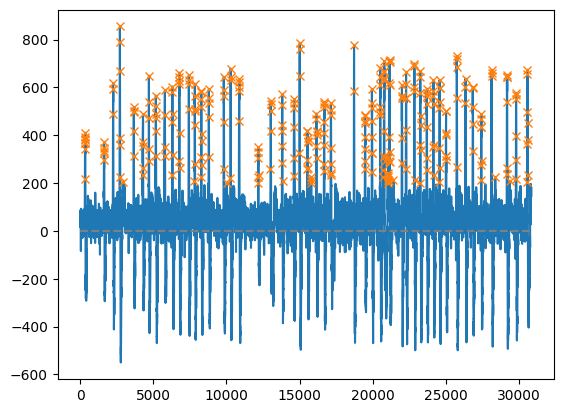

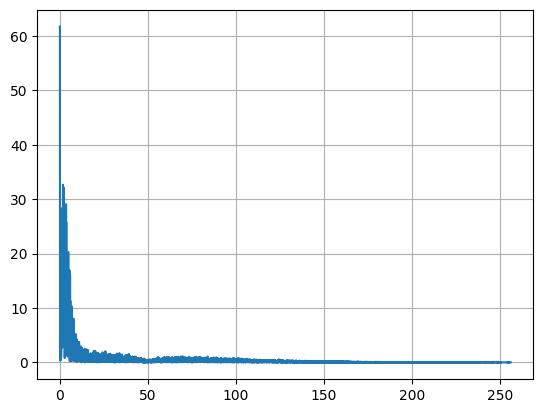

PSD:29420.533134519745
x = [ 65.  48.  34. ... 147. 172. 181.]
y = [1. 1. 1. ... 1. 1. 1.]
p(y) = [1. 1. 1. ... 1. 1. 1.]
Log Loss / Cross Entropy = 0.0004
0.0004088208142147915


In [90]:
# TEMPORAL FEATURES

def psd(y):
    # Number of samplepoints
    N = 512
    # sample spacing
    T = 1.0 / 512.0
    # From 0 to N, N*T, 2 points.
    #x = np.linspace(0.0, 1.0, N)
    #y = 1*np.sin(10.0 * 2.0*np.pi*x) + 9*np.sin(20.0 * 2.0*np.pi*x)


    # Original Bandpass
    fs = 512.0
    fso2 = fs/2
    #Nd,wn = buttord(wp=[9/fso2,11/fso2], ws=[8/fso2,12/fso2],
    #   gpass=3.0, gstop=40.0)
    #b,a = butter(Nd,wn,'band')
    #y = filtfilt(b,a,y)

    y = butter_bandpass_filter(y, 8.0, 15.0, fs, order=6)


    yf = fft(y)
    #xf = np.linspace(0.0, int(1.0/(2.0*T)), int(N/2))
    #import matplotlib.pyplot as plt
    #plt.plot(xf, 2.0/N * np.abs(yf[0:int(N/2)]))
    #plt.axis((0,60,0,1))
    #plt.grid()
    #plt.show()

    return np.sum(np.abs(yf[0:int(N/2)]))

def crest_factor(x):
    return np.max(np.abs(x))/np.sqrt(np.mean(np.square(x)))

def hjorth(a):
    r"""
    Compute Hjorth parameters [HJO70]_.
    .. math::
        Activity = m_0 = \sigma_{a}^2
    .. math::
        Complexity = m_2 = \sigma_{d}/ \sigma_{a}
    .. math::
        Morbidity = m_4 =  \frac{\sigma_{dd}/ \sigma_{d}}{m_2}
    Where:
    :math:`\sigma_{x}^2` is the mean power of a signal :math:`x`. That is, its variance, if it's mean is zero.
    :math:`a`, :math:`d` and :math:`dd` represent the original signal, its first and second derivatives, respectively.
    .. note::
        **Difference with PyEEG:**
        Results is different from [PYEEG]_ which appear to uses a non normalised (by the length of the signal) definition of the activity:
        .. math::
            \sigma_{a}^2 = \sum{\mathbf{x}[i]^2}
        As opposed to
        .. math::
            \sigma_{a}^2 = \frac{1}{n}\sum{\mathbf{x}[i]^2}
    :param a: a one dimensional floating-point array representing a time series.
    :type a: :class:`~numpy.ndarray` or :class:`~pyrem.time_series.Signal`
    :return: activity, complexity and morbidity
    :rtype: tuple(float, float, float)
    Example:
    >>> import pyrem as pr
    >>> import numpy as np
    >>> # generate white noise:
    >>> noise = np.random.normal(size=int(1e4))
    >>> activity, complexity, morbidity = pr.univariate.hjorth(noise)
    """

    first_deriv = np.diff(a)
    second_deriv = np.diff(a,2)

    var_zero = np.mean(a ** 2)
    var_d1 = np.mean(first_deriv ** 2)
    var_d2 = np.mean(second_deriv ** 2)

    activity = var_zero
    morbidity = np.sqrt(var_d1 / var_zero)
    complexity = np.sqrt(var_d2 / var_d1) / morbidity

    return activity, morbidity, complexity

def pfd(a):
    r"""
    Compute Petrosian Fractal Dimension of a time series [PET95]_.
    It is defined by:
    .. math::
        \frac{log(N)}{log(N) + log(\frac{N}{N+0.4N_{\delta}})}
    .. note::
        **Difference with PyEEG:**
        Results is different from [PYEEG]_ which implemented an apparently erroneous formulae:
        .. math::
            \frac{log(N)}{log(N) + log(\frac{N}{N}+0.4N_{\delta})}
    Where:
    :math:`N` is the length of the time series, and
    :math:`N_{\delta}` is the number of sign changes.
    :param a: a one dimensional floating-point array representing a time series.
    :type a: :class:`~numpy.ndarray` or :class:`~pyrem.time_series.Signal`
    :return: the Petrosian Fractal Dimension; a scalar.
    :rtype: float
    Example:
    >>> import pyrem as pr
    >>> import numpy as np
    >>> # generate white noise:
    >>> noise = np.random.normal(size=int(1e4))
    >>> pr.univariate.pdf(noise)
    """

    diff = np.diff(a)
    # x[i] * x[i-1] for i in t0 -> tmax
    prod = diff[1:-1] * diff[0:-2]

    # Number of sign changes in derivative of the signal
    N_delta = np.sum(prod < 0)
    n = len(a)

    return np.log(n)/(np.log(n)+np.log(n/(n+0.4*N_delta)))

print('Temporal Features')

# reemplacé en este punto los distintos archivos

signals = pd.read_csv("carobaseline.dat", delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

data = signals.values

eeg = data[:,2]
# %%
ptp = abs(np.max(eeg)) + abs(np.min(eeg))
rms = np.sqrt(np.mean(eeg**2))
cf = crest_factor(eeg)

print ('Peak-To-Peak:' + str(ptp))
print ('Root Mean Square:' + str(rms))
print ('Crest Factor:' + str(cf))

from collections import Counter
from scipy import stats

entropy = stats.entropy(list(Counter(eeg).values()), base=2)

print('Shannon Entropy:' + str(entropy))


activity, complexity, morbidity = hjorth(eeg)

print('Activity:' + str(activity))
print('Complexity:' + str(complexity))
print('Mobidity:' + str(morbidity))


fractal = pfd(eeg)
print('Fractal:' + str(fractal))

import matplotlib.pyplot as plt
from scipy.signal import find_peaks

peaks, _ = find_peaks(eeg, height=200)
plt.plot(eeg)
plt.plot(peaks, eeg[peaks], "x")
plt.plot(np.zeros_like(eeg), "--", color="gray")
plt.show()


N = len (eeg)
T = 1.0 / 512.0

# We can put an additional frequency component to verify that things are working ok
shamsignal = False
if (shamsignal):
    x= np.linspace(0.0, 1.0, N)
    eeg = eeg[:512] +  100*np.sin(10.0 * 2.0*np.pi*x)


yf = fft(eeg)
xf = np.linspace(0.0, int(1.0/(2.0*T)), int(N/2))

plt.close()

plt.plot(xf, 2.0/N * np.abs(yf[0:int(N/2)]))
plt.grid()
plt.show()

print('PSD:' + str(psd(eeg[:512])))

# %%
# This code uses logisticregression to derive and indicative value that
# can be used as proxy of each signal segment.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np
from math import log

#x = np.array([-2.2, -1.4, -.8, .2, .4, .8, 1.2, 2.2, 2.9, 4.6])
#y = np.array([0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

x= eeg
y = np.sign(eeg)
y[y == -1] = 0
y[y == 0] = 0


logr = LogisticRegression(solver='lbfgs')
logr.fit(x.reshape(-1, 1), y)

y_pred = logr.predict_proba(x.reshape(-1, 1))[:, 1].ravel()
loss = log_loss(y, y_pred)

# %%

y_inv = np.asarray([1-val for val in y_pred])
y_i = np.asarray([1-val for val in y])

y_pred[y_pred == 0] = 1e-10
y_inv[y_inv == 0] = 1e-10

sum1 = [log(val) for val in y_pred]
sum2 = [log(val) for val in y_inv]



s1 = sum1 * y
s2 = sum2 * y_i

Hq = - 1.0 / len(y_pred) * (s1.sum()+ s2.sum())

# Logloss is binary cross entropy.
print('x = {}'.format(x))
print('y = {}'.format(y))
print('p(y) = {}'.format(np.round(y_pred, 2)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))
print (Hq)
# %%

In [103]:
pip install keras.models

In [107]:
pip install tf_keras

In [179]:
"""
==========================================
Signal Feature Classification
==========================================

# Run with a virtual environment with keras, sklearn, numpy and tensorflow installed.
# EPOC Emotiv file format https://arxiv.org/pdf/2206.09051

"""
print(__doc__)

import pandas as pd

import numpy as np

from struct import *

import sys, select

import platform
import socket
import gevent

import time
import datetime
import os

from scipy.fftpack import fft

import math

from scipy.signal import firwin, remez, kaiser_atten, kaiser_beta
from scipy.signal import butter, filtfilt, buttord

from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

from scipy.signal import butter, lfilter

from sklearn.linear_model import LogisticRegression

import tf_keras

#from keras.models import Sequential

#from keras.layers import Dense


import matplotlib.pyplot as plt

signals1 = pd.read_csv("caromirarconanteojos.dat", delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])
print(signals1.head())
data1 = signals1.values
print('Ahora tienen un tensor de numpy (data) correspondiente al archivo "caromirarconanteojos.dat')
#print (data1)


signals2= pd.read_csv("caromirarsinanteojos.dat", delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])
print(signals2.head())
data2 = signals2.values
print('Ahora tienen un tensor de numpy (data) correspondiente al archivo "caromirarsinanteojos')
#print (data2)

def isartifact(window, threshold=80):
    # Window is EEG Matrix

    awindow = np.asarray(window)
    ameans = np.asarray(  window   ).mean(0)
    signalaverage = ameans.tolist()
    athresholds = np.asarray([threshold]*len(signalaverage))

    # FIXME
    for t in range(0,len(window)):
        asample = (ameans+athresholds)-awindow[t]
        #print asample
        for c in range(0,asample.shape[0]):
            # while (ameans+athresholds)>(awindow)
            if asample[c]<0:
                return True


    return False

print ("hola")

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def psd(y):
    # Number of samplepoints
    N = 512
    # sample spacng
    T = 1.0 / 512.0
    # From 0 to N, N*T, 2 points.
    #x = np.linspace(0.0, 1.0, N)
    #y = 1*np.sin(10.0 * 2.0*np.pi*x) + 9*np.sin(20.0 * 2.0*np.pi*x)


    # Original Bandpass
    fs = 512.0
    fso2 = fs/2
    #Nd,wn = buttord(wp=[9/fso2,11/fso2], ws=[8/fso2,12/fso2],
    #   gpass=3.0, gstop=40.0)
    #b,a = butter(Nd,wn,'band')
    #y = filtfilt(b,a,y)

    y = butter_bandpass_filter(y, 8.0, 15.0, fs, order=6)


    yf = fft(y)
    #xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
    #import matplotlib.pyplot as plt
    #plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
    #plt.axis((0,60,0,1))
    #plt.grid()
    #plt.show()

    return np.sum(np.abs(yf[0:int(N/2)]))

print ("hola2")

import time
import datetime
import os

class Packet():
    def init(self):
        self.O1 = 0
        self.O2 = 0
        self.gyro_x = 0
        self.gyro_y = 0


class OfflineHeadset:
    def __init__(self, subject,label,paradigm='Alfa'):
        # @TODO Need to parametrize this.
        # NOTE Search for datasets on current "Data" directory
        self.basefilename = 'data/%s/%s/e.%d.l.%d.dat'
        self.paradigm = paradigm
        self.readcounter = 0
        self.eeg = True
        self.label = label
        self.subject = subject
        self.fileindex = 0
        self.f = None

    def setup(self):
        pass

    def setupfile(self):
        self.datasetfile = self.basefilename % (self.subject,self.paradigm,self.fileindex,self.label)
        print (self.datasetfile)
        if os.path.isfile(self.datasetfile):
            if self.f:
                self.f.close()
            self.f = open(self.datasetfile,'r')
            return True
        else:
            return False

    def nextline(self):
        line = None
        if self.f:
            line = self.f.readline()
        if (not line):
            self.fileindex = self.fileindex + 1

            if self.setupfile():
                return self.nextline()
            else:
                return None
        else:
            return line

    def dequeue(self):
        line = self.nextline()
        if (line):
            data = line.split('\r\n')[0].split(' ')
            packet = Packet()
            packet.O1 = [float(data[7]),0]
            packet.O2 = [float(data[8]),0]
            packet.gyro_x = 0
            packet.gyro_y = 0

            self.readcounter = self.readcounter + 1
            return packet
        else:
            self.eeg = False
            return None


    def close(self):
        if (self.f):
            self.f.close()

print ("hola3")

#Segmentación de la serie de tiempo.
def process(headset):
    ts = time.time()
    st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d-%H-%M-%S')
    log = open('data/biosensor-%s.dat' % st, 'w')
    #plotter = Plotter(500,4000,5000)
    print ("Starting BioProcessing Thread...")
    readcounter=0
    iterations=0



    N = 512.0

    print ("N")

    window = []
    fullsignal = []
    awindow = None
    afullsignal = None
    features = []

    while headset.eeg:
        packet = headset.dequeue()
        interations=iterations+1
        if (packet != None):
            datapoint = [packet.O1[0], packet.O2[0]]

            #plotter.plotdata( [packet.gyro_x, packet.O2[0], packet.O1[0]])
            log.write( str(packet.gyro_x) + "\t" + str(packet.gyro_y) + "\n" )

            window.append( datapoint )


            # Este punto establece cuando se hace el corte,
            # como se genera el feature y
            # como se hace el desplazamiento de la ventana.
            # Este es el metodo de Welsh para EEG.
            if len(window)>=N:
                if not isartifact(window):
                    awindow = np.asarray( window )
                    fullsignal = fullsignal + window
                    afullsignal = np.asarray( fullsignal )

                    if (len(fullsignal) > 0):
                        awindow = awindow - afullsignal.mean(0)

                    o1 = psd(awindow[:,0])
                    o2 = psd(awindow[:,1])

                    print (o1, o2)

                    features.append( [o1, o2] )

                # Slide window
                window = window[int(N/2):N]
                #window = window[1:N]

            readcounter=readcounter+1

        if (readcounter==0 and iterations>50):
            headset.eeg = False
        gevent.sleep(0.001)

    log.close()

    return features

def reshapefeature(feature, featuresize):
    feature=feature[0:feature.shape[0]-(feature.shape[0]%featuresize)]
    feature = np.reshape( feature, (int(feature.shape[0]/int(featuresize/feature.shape[1])),featuresize) )

    return feature

def classify(afeatures1, afeatures2, featuresize):

    print ('Feature 1 Size %d,%d' % (afeatures1.shape))
    print ('Feature 2 Size %d,%d' % (afeatures2.shape))

    afeatures1 = reshapefeature(afeatures1, featuresize)
    afeatures2 = reshapefeature(afeatures2, featuresize)

    featuredata = np.concatenate ((afeatures1,afeatures2))
    featurelabels = np.concatenate( (np.zeros(afeatures1.shape[0]),(np.zeros(afeatures2.shape[0])+1) )  )

    boundary = int(featuredata.shape[0]/2.0)

    print ('Boundary %d:' % boundary)

    # Reshape and shuffle the features
    reorder = np.random.permutation(featuredata.shape[0])

    trainingdata = featuredata[reorder[0:boundary]]
    traininglabels = featurelabels[reorder[0:boundary]]

    testdata = featuredata[reorder[boundary+1:featuredata.shape[0]]]
    testlabels = featurelabels[reorder[boundary+1:featuredata.shape[0]]]

    print ('Training Dataset Size %d,%d' % (trainingdata.shape))
    print ('Test Dataset Size %d,%d' % (testdata.shape))


    clf = svm.SVC(kernel='linear', C = 1.0)
    clf.fit(trainingdata,traininglabels)


    predlabels = clf.predict(testdata)
    C = confusion_matrix(testlabels, predlabels)
    acc = (float(C[0,0])+float(C[1,1])) / ( testdata.shape[0])
    print ('SVM Feature Dim: %d Accuracy: %f' % (featuresize,acc))
    print(C)

    target_names = ['Open', 'Closed']
    report = classification_report(testlabels, predlabels, target_names=target_names)
    print(report)

    # all parameters not specified are set to their defaults
    logisticRegr = LogisticRegression()
    logisticRegr.fit(trainingdata,traininglabels)

    # Returns a NumPy Array
    # Predict for One Observation (image)
    predlabels = logisticRegr.predict(testdata)

    C = confusion_matrix(testlabels, predlabels)
    acc = (float(C[0,0])+float(C[1,1])) / ( testdata.shape[0])
    print ('LogReg Feature Dim: %d Accuracy: %f' % (featuresize,acc))
    print(C)

    target_names = ['Open', 'Closed']
    report = classification_report(testlabels, predlabels, target_names=target_names)
    print(report)

    model = tf_keras.Sequential([
        tf_keras.Dense(64, activation='tanh', input_shape=(trainingdata.shape[1],)),
        tf_keras.Dense(32, activation='tanh'),
        tf_keras.Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    hist = model.fit(trainingdata, traininglabels,
          batch_size=10, epochs=1000*trainingdata.shape[1],verbose=0,
          validation_split=0.4)

    predlabels = model.predict(testdata)
    #print(predlabels)
    predlabels = predlabels.round()
    #print(predlabels)
    C = confusion_matrix(testlabels, predlabels)
    acc = (float(C[0,0])+float(C[1,1])) / ( testdata.shape[0])
    print ('Keras Feature Dim: %d Accuracy: %f' % (featuresize,acc))
    print(C)

    print(model.evaluate(testdata,testlabels))
    print ('Keras Model Accuracy: %f' % (model.evaluate(testdata,testlabels)[1]))

    target_names = ['Open', 'Closed']
    report = classification_report(testlabels, predlabels, target_names=target_names)
    print(report)

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()


    #plt.plot(hist.history['acc'])
    #plt.plot(hist.history['val_acc'])
    #plt.title('Model accuracy')
    #plt.ylabel('Accuracy')
    #plt.xlabel('Epoch')
    #plt.legend(['Train', 'Val'], loc='lower right')
    #plt.show()


# Esto es lo que hace el método principal.

# Primero toma muestras de señales de tiempo de una personas.  Estas señales corresponden a dos experiemntos,
# donde la persona durante un tiempo estaba con los ojos cerrados, y luego con los ojos abiertos.
# Eso dispara un cambio en las señales occipitales, en O1 y O2 que son dos canales.  Ese cambio se manifiesta
# como un aumento de la potencia de 10 Hz cuando la persona tiene los ojos cerrados.
def featureextractor():
    # Get features from label 1.
    headset = data1
    features1 = process(headset)
    headset.close()
    # Get features from label 2
    headset = data2
    features2 = process(headset)
    headset.close()

    # En este punto se tienen una secuencia de features bidimensionales.  El PSD de O1 y O2 durante una ventana de tiempo.
    afeatures1 = np.asarray(features1)
    afeatures2 = np.asarray(features2)

    print (afeatures1.shape)
    print( afeatures2.shape)

    print (afeatures1.mean(0))
    print (afeatures2.mean(0))

    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(afeatures1[:,0], afeatures1[:,1], s=10, c='b', marker="x", label='Open')
    ax1.scatter(afeatures2[:,0], afeatures2[:,1], s=10, c='r', marker="o", label='Closed')
    plt.xlabel('PSD O2')
    plt.ylabel('PSD O1')
    plt.legend(loc='upper left')
    plt.show()

    # Group time features in tuples, 4-tuples and 8-tuples and classify them
    classify(afeatures1, afeatures2,2)
    classify(afeatures1, afeatures2,4)
    classify(afeatures1, afeatures2,8)

    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(afeatures1[:,0], afeatures1[:,1], s=10, c='b', marker="x", label='Open')
    ax1.scatter(afeatures2[:,0], afeatures2[:,1], s=10, c='r', marker="o", label='Closed')
    plt.xlabel('PSD O2')
    plt.ylabel('PSD O1')
    plt.legend(loc='upper left')
    plt.show()


# Este If de python, sirve cuando un programa funciona como una libreria, por lo que no tiene código que se ejecute
# que no esté en el bloque global (sin indentación).  En esos casos este if sirve para indicar que se tiene
# que ejecutar cuando a este .py se lo ejecuta de manera directa.
#if __name__ == "__main__":

    #featureextractor()


Signal Feature Classification

# Run with a virtual environment with keras, sklearn, numpy and tensorflow installed.
# EPOC Emotiv file format https://arxiv.org/pdf/2206.09051


      timestamp  counter  eeg  attention  meditation  blinking
0  1.752273e+09       48 -131          0           0         0
1  1.752273e+09       49 -150          0           0         0
2  1.752273e+09       50 -163          0           0         0
3  1.752273e+09       51 -183          0           0         0
4  1.752273e+09       52 -220          0           0         0
Ahora tienen un tensor de numpy (data) correspondiente al archivo "caromirarconanteojos.dat
      timestamp  counter  eeg  attention  meditation  blinking
0  1.752273e+09       58   24          0           0         0
1  1.752273e+09       59    8          0           0         0
2  1.752273e+09       60    3          0           0         0
3  1.752273e+09       61    6          0           0         0
4  1.752273e+09       62   10       